In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read in datasets
buildings = pd.read_csv("building_metadata.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
weather_train = pd.read_csv("weather_train.csv")
weather_test = pd.read_csv("weather_test.csv")

In [3]:
# Root Mean Squared Log Error function: method the models will be evaluated with
def RMSLE(predicted, actual):
    p = predicted
    a = actual
    n = a.count()
    
#     Temporary array of (log(p+1)-log(a+1))^2
    temp = np.power(np.log1p(p) - np.log1p(a), 2)
#     RMSLE = sqrt(1/n[log(p+1)-log(a+1)]^2)
    rmsle = np.sqrt(np.sum(temp) / n)
    return rmsle

In [24]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [4]:
buildings.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [ ]:
# Merge site IDs into train & test data
train['site_id'] = 

In [5]:
buildings['floor_count'].unique()

array([nan,  5.,  4., 10.,  6.,  8.,  7.,  9., 13., 16., 11., 12.,  2.,
        3.,  1., 14., 21., 26., 19.])

In [6]:
buildings['floor_count'].replace(np.NaN, 0, inplace=True)

In [7]:
buildings.isnull().sum()

site_id          0
building_id      0
primary_use      0
square_feet      0
year_built     774
floor_count      0
dtype: int64

In [8]:
train.isnull().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [9]:
weather_train.isnull().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

In [10]:
weather_train.count()

site_id               139773
timestamp             139773
air_temperature       139718
cloud_coverage         70600
dew_temperature       139660
precip_depth_1_hr      89484
sea_level_pressure    129155
wind_direction        133505
wind_speed            139469
dtype: int64

In [11]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [12]:
weather_train.tail()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [13]:
buildings.count()

site_id        1449
building_id    1449
primary_use    1449
square_feet    1449
year_built      675
floor_count    1449
dtype: int64

In [14]:
weather_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [15]:
# Turning the str object 'timestamp' into a datetime object

from datetime import datetime

weather_train['timestamp'] = weather_train['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [16]:
# Creating a variable for day
weather_train['day'] = weather_train['timestamp'].apply(lambda x: x.date())

In [17]:
weather_train['day'].head()

0    2016-01-01
1    2016-01-01
2    2016-01-01
3    2016-01-01
4    2016-01-01
Name: day, dtype: object

In [18]:
# Get the time, day, and hour of each timestamp in the dataset; help from: https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/
weather_train['time_of_day'] = weather_train['timestamp'].apply(lambda x: x.time())
weather_train['day_of_week'] = weather_train['timestamp'].apply(lambda x: x.weekday())    
weather_train['hour_of_day'] = weather_train['time_of_day'].apply(lambda x: x.hour)
# Mark the month for each entry so we can look at monthly patterns
weather_train['month'] = weather_train['timestamp'].apply(lambda x: x.month)

# Is each time stamp on a working day (Mon-Fri)
weather_train['working_day'] = (weather_train['day_of_week'] >= 0) & (weather_train['day_of_week'] <= 4)

In [19]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,time_of_day,day_of_week,hour_of_day,month,working_day
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2016-01-01,00:00:00,4,0,1,True
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,2016-01-01,01:00:00,4,1,1,True
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,2016-01-01,02:00:00,4,2,1,True
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,2016-01-01,03:00:00,4,3,1,True
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,2016-01-01,04:00:00,4,4,1,True


In [20]:
weather_train['site_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [21]:
# 16 unique sites -> check out seasonality of some weather data?

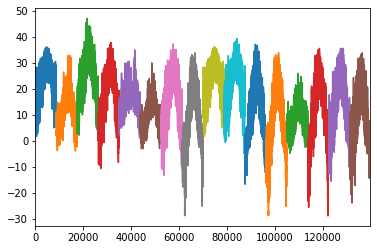

In [23]:
# Group by site and plot
temp = weather_train.groupby(['site_id'])
temp['air_temperature'].plot();

In [ ]:
# Check out seasonality of the target metric by site
temp = buildings.groupby(['site_id'])
temp['']

In [ ]:
# Define tentative features and target
# features = []

In [ ]:
# Linear Regression Model
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()

